### Multinomial Naive Bayes

##### Sathvik B - 1MS17CS148
##### Sathvik K P- 1MS17CS143

##### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score

##### Loading the dataset

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Dropping the 'ID' field as it is not useful for prediction

In [4]:
df.drop(['Id'], axis=1,inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Scatter plot of the different species with SepalLength as X axis and SepalWidth as Y axis

C:\Users\sathv\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


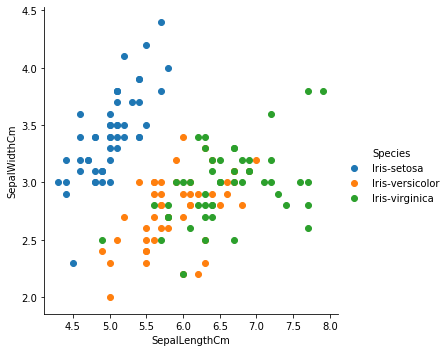

In [6]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

##### Boxplot to determine if outliers are present

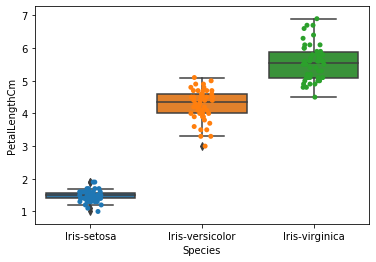

In [7]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

##### Graph to plot petal length per species

C:\Users\sathv\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


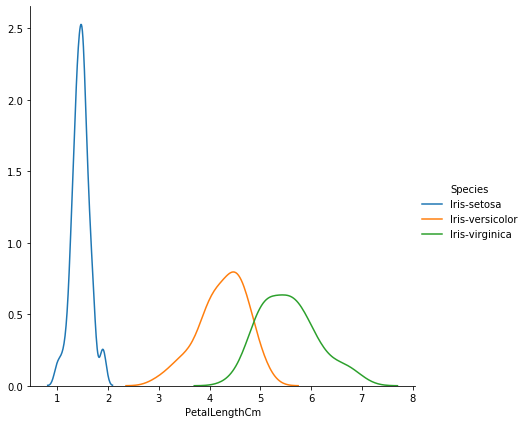

In [8]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

##### COnverting from categorical to numerical

In [9]:
df['Species'] = df['Species'].apply(lambda x: 0 if x=='Iris-setosa' else (1 if x=='Iris-versicolor' else 2))

##### Splitting into train and test sets

In [10]:
X=df.drop(['Species'],axis=1)
y=df['Species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Loading multinomial naive bayes classifier and fitting it on training data

In [12]:
clf = MultinomialNB()

In [13]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##### Prediction on test dataset

In [14]:
y_pred = clf.predict(X_test)

##### Confusion matrix

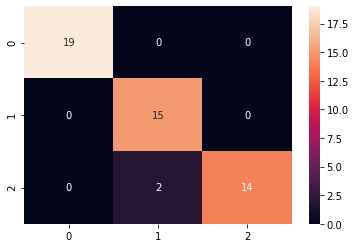

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [16]:
print(accuracy_score(y_test,y_pred))

0.96


##### Thus, we see that we get a testing accuracy of 96%, meaning that our model has fit the dataset well